In [8]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from scipy.spatial.distance import squareform
df = pd.read_csv("./output/df_cpu_cleaned.csv")
df= df.drop(['Time', 'sniffer', 'database', 'controller'], axis=1)
df= df[df['nb_flows']!=0]
print(df['class'])

6        0.0
7        0.0
9        0.0
10       0.0
18       0.0
        ... 
2192    49.0
2193     0.0
2194     0.0
2195     2.0
2196     0.0
Name: class, Length: 624, dtype: float64


(624, 70)
Index(['class', 'flow_duration', 'flow_byts_s', 'flow_pkts_s', 'fwd_pkts_s',
       'bwd_pkts_s', 'tot_fwd_pkts', 'tot_bwd_pkts', 'totlen_fwd_pkts',
       'totlen_bwd_pkts', 'fwd_pkt_len_max', 'fwd_pkt_len_min',
       'fwd_pkt_len_mean', 'fwd_pkt_len_std', 'bwd_pkt_len_max',
       'bwd_pkt_len_min', 'bwd_pkt_len_mean', 'bwd_pkt_len_std', 'pkt_len_max',
       'pkt_len_min', 'pkt_len_mean', 'pkt_len_std', 'pkt_len_var',
       'fwd_header_len', 'bwd_header_len', 'fwd_seg_size_min',
       'fwd_act_data_pkts', 'flow_iat_mean', 'flow_iat_max', 'flow_iat_min',
       'flow_iat_std', 'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_min',
       'fwd_iat_mean', 'fwd_iat_std', 'bwd_iat_tot', 'bwd_iat_max',
       'bwd_iat_min', 'bwd_iat_mean', 'bwd_iat_std', 'fin_flag_cnt',
       'down_up_ratio', 'pkt_size_avg', 'init_fwd_win_byts',
       'init_bwd_win_byts', 'active_max', 'active_min', 'active_mean',
       'active_std', 'idle_max', 'idle_min', 'idle_mean', 'idle_std',
       'fwd_byts_

<Axes: >

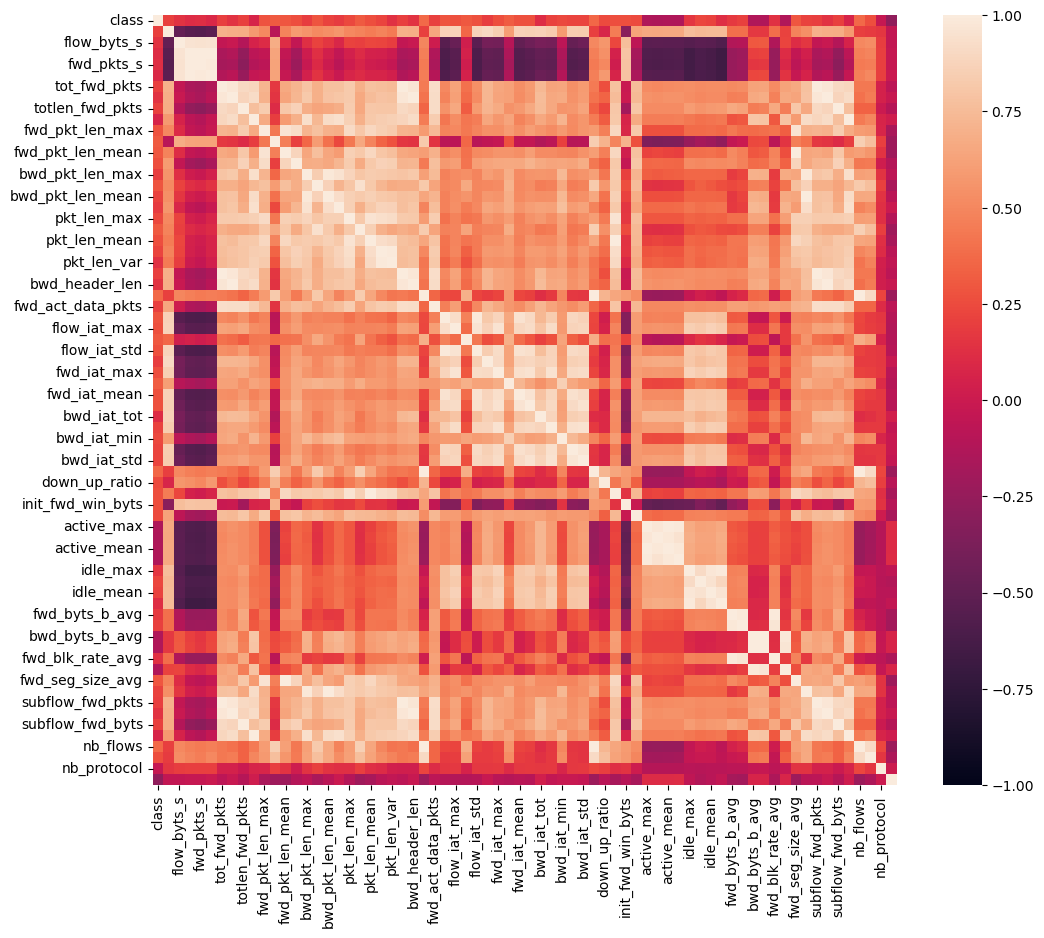

In [9]:
plt.figure(figsize=(12, 10))
corr_df= df
corr_df= corr_df.drop([ 'classifier'], axis=1)
r = corr_df.corr(method='spearman')
print(corr_df.shape)
print(corr_df.columns)
print(r.shape)
sns.heatmap(r, vmin=-1, vmax=1)

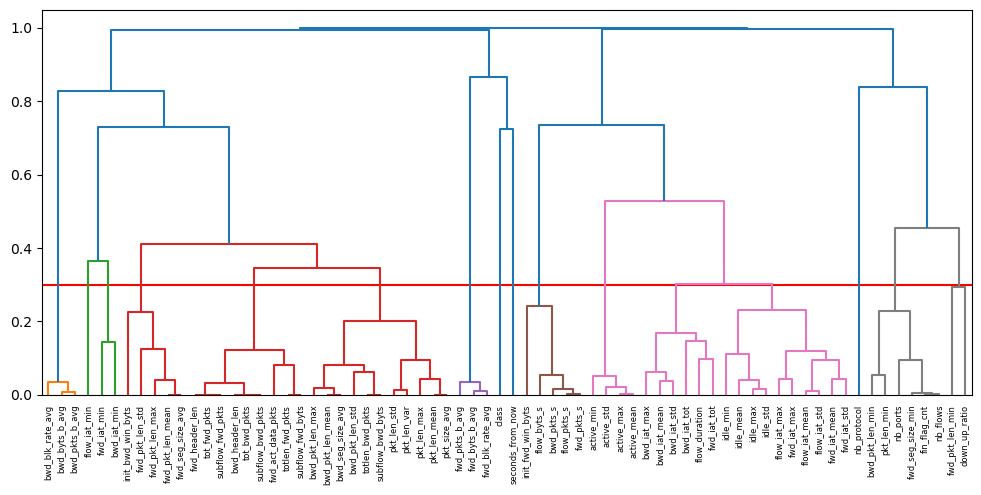

In [10]:
plt.figure(figsize=(12,5))
dissimilarity = 1 - abs(r)

Z = linkage(squareform(dissimilarity), 'complete')
plt.axhline(y=.3, c="red")
dendrogram(Z, labels=corr_df.columns, orientation='top',
           leaf_rotation=90);
plt.show()

In [11]:
df_corr= corr_df
df_corr= df_corr.drop(['flow_iat_mean', 'flow_iat_std', 'flow_iat_mean', 'fwd_pkts_b_avg', 'fwd_byts_b_avg', 'subflow_bwd_pkts', 'tot_bwd_pkts', 'fwd_pkts_s', 'bwd_byts_b_avg', 'bwd_blk_rate_avg', 'bwd_pkts_s', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_header_len', 'flow_pkts_s', 'fwd_pkt_len_mean', 'fwd_seg_size_avg', 'fwd_pkt_len_std', 'pkt_len_max', 'pkt_len_mean', 'pkt_size_avg', 'pkt_len_std', 'pkt_len_var', 'flow_byts_s', 'totlen_bwd_pkts', 'flow_iat_max', 'idle_max', 'fwd_pkt_len_min', 'nb_flows', 'active_mean', 'active_max', 'active_std', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_pkt_len_std', 'bwd_seg_size_avg', 'bwd_pkt_len_mean', 'bwd_pkt_len_max', 'fwd_seg_size_min', 'down_up_ratio', 'bwd_iat_tot', 'init_bwd_win_byts', 'bwd_iat_mean', 'bwd_iat_max', 'fwd_iat_min', 'nb_ports', 'init_fwd_win_byts', 'bwd_iat_min', 'tot_fwd_pkts', 'subflow_bwd_byts', 'totlen_fwd_pkts', 'subflow_fwd_pkts', 'subflow_fwd_byts'], axis=1)

<Axes: >

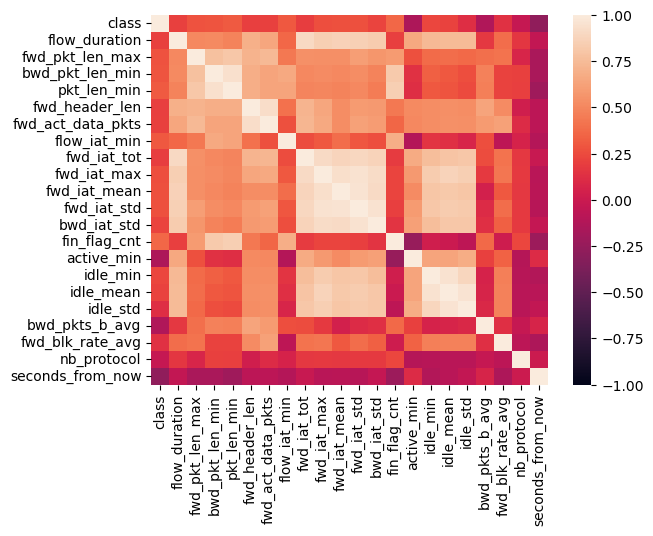

In [12]:
r1 = df_corr.corr(method='spearman')
sns.heatmap(r1, vmin=-1, vmax=1)

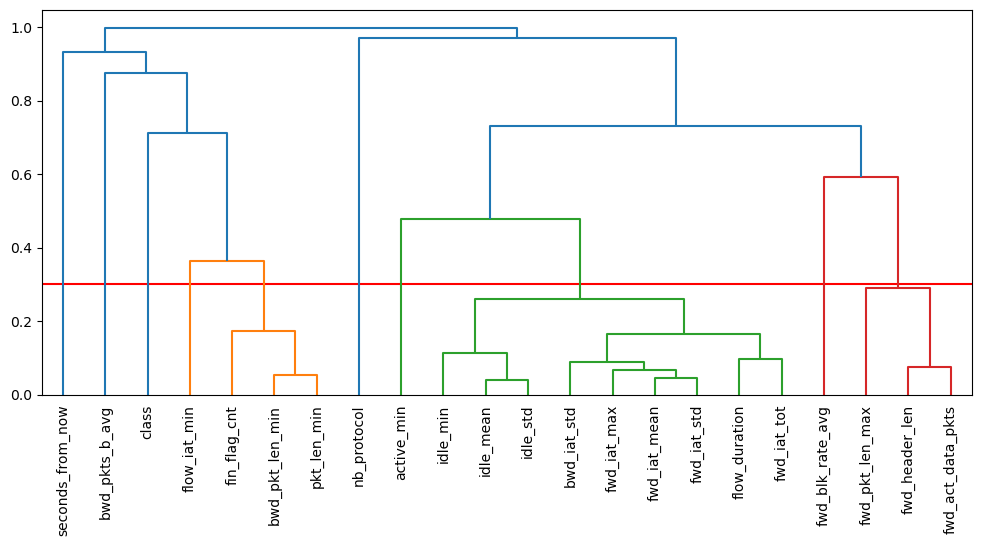

In [13]:
r1 = df_corr.corr(method='spearman')
plt.figure(figsize=(12, 5))
dissimilarity = 1 - abs(r1)
Z = linkage(squareform(dissimilarity), 'complete')
plt.axhline(y=.3, c="red")
dendrogram(Z, labels=df_corr.columns, orientation='top',
           leaf_rotation=90);

In [17]:
import numpy as np
def discretize_by_median(data, column, median_value, margin=0.0):
    # Define the margin around the median
    lower_bound = median_value - margin
    upper_bound = median_value + margin

    # Filter out points around the median
    filtered_data = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

    # Discretize the filtered data
    filtered_data[column + '_discretized'] = pd.cut(filtered_data[column],
                                                    bins=[filtered_data[column].min(), median_value, filtered_data[column].max()],
                                                    labels=[0, 1])
    return filtered_data

print(np.median(df['classifier']))
df= discretize_by_median(df, 'classifier', np.median(df['classifier']) )

0.0192


C:\Users\hr_mo\AppData\Local\Temp\ipykernel_17624\3978957668.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data[column + '_discretized'] = pd.cut(filtered_data[column],


In [18]:
X= df.drop(['flow_iat_mean', 'flow_iat_std', 'flow_iat_mean', 'fwd_pkts_b_avg', 'fwd_byts_b_avg', 'subflow_bwd_pkts', 'tot_bwd_pkts', 'fwd_pkts_s', 'bwd_byts_b_avg', 'bwd_blk_rate_avg', 'bwd_pkts_s', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_header_len', 'flow_pkts_s', 'fwd_pkt_len_mean', 'fwd_seg_size_avg', 'fwd_pkt_len_std', 'pkt_len_max', 'pkt_len_mean', 'pkt_size_avg', 'pkt_len_std', 'pkt_len_var', 'flow_byts_s', 'totlen_bwd_pkts', 'flow_iat_max', 'idle_max', 'fwd_pkt_len_min', 'nb_flows', 'active_mean', 'active_max', 'active_std', 'subflow_bwd_pkts', 'totlen_bwd_pkts', 'bwd_pkt_len_std', 'bwd_seg_size_avg', 'bwd_pkt_len_mean', 'bwd_pkt_len_max', 'fwd_seg_size_min', 'down_up_ratio', 'bwd_iat_tot', 'init_bwd_win_byts', 'bwd_iat_mean', 'bwd_iat_max', 'fwd_iat_min', 'nb_ports', 'init_fwd_win_byts', 'bwd_iat_min', 'tot_fwd_pkts', 'subflow_bwd_byts', 'totlen_fwd_pkts', 'subflow_fwd_pkts', 'subflow_fwd_byts', 'classifier', 'classifier_discretized'], axis=1)
Y= df['classifier_discretized']
print(Y.unique)

<bound method Series.unique of 6       1
7       1
9       1
10      1
18      0
       ..
2192    0
2193    0
2194    0
2195    0
2196    0
Name: classifier_discretized, Length: 620, dtype: category
Categories (2, int64): [0 < 1]>


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Index(['class', 'flow_duration', 'fwd_pkt_len_max', 'bwd_pkt_len_min',
       'pkt_len_min', 'fwd_header_len', 'fwd_act_data_pkts', 'flow_iat_min',
       'fwd_iat_tot', 'fwd_iat_max', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_std', 'fin_flag_cnt', 'active_min', 'idle_min', 'idle_mean',
       'idle_std', 'bwd_pkts_b_avg', 'fwd_blk_rate_avg', 'nb_protocol',
       'seconds_from_now'],
      dtype='object')


PyALE._ALE_generic:INFO: Discrete feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Continuous feature detected.
PyALE._ALE_generic:INFO: Conti

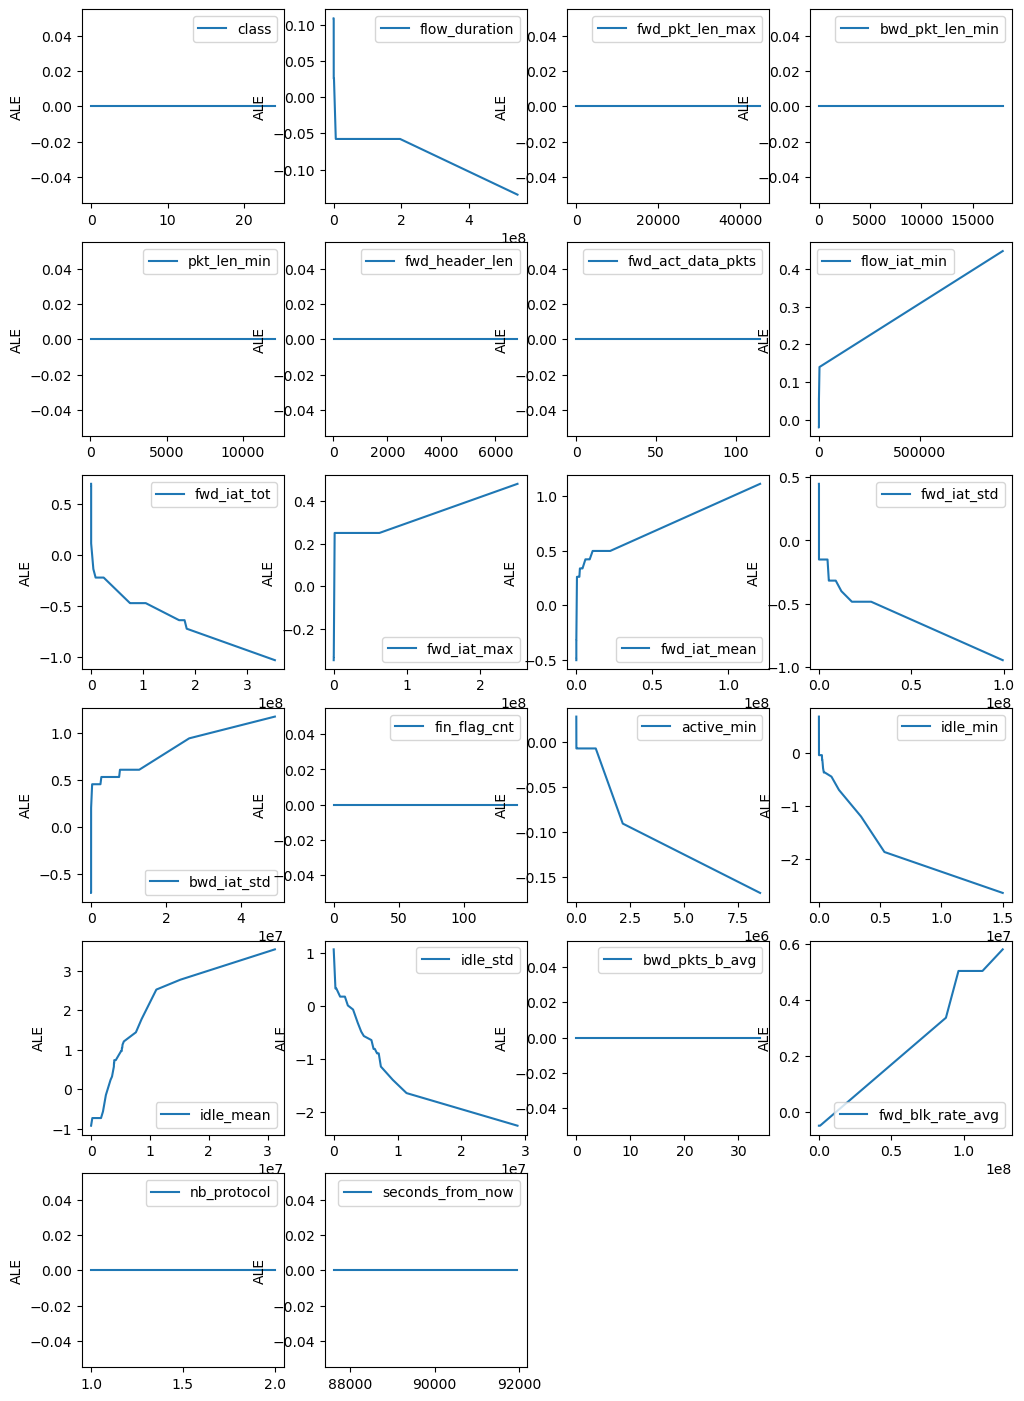

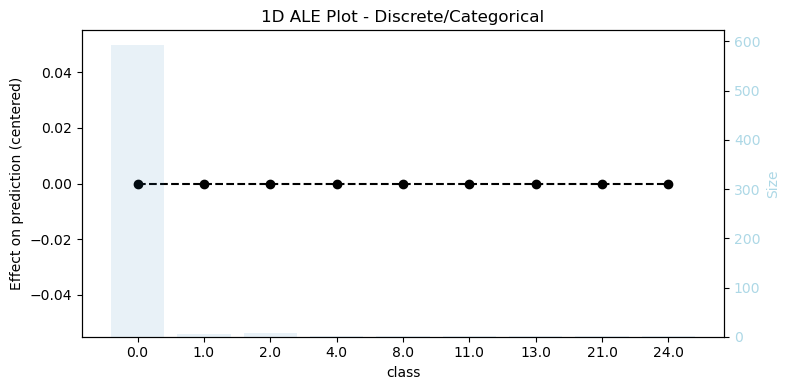

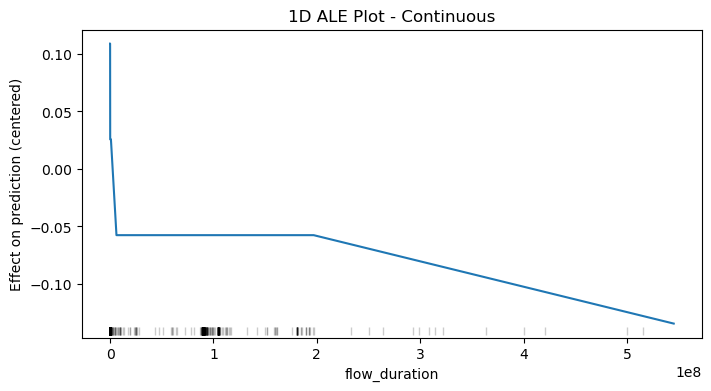

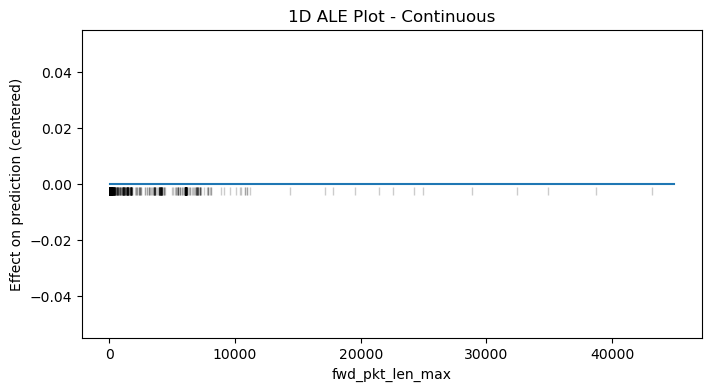

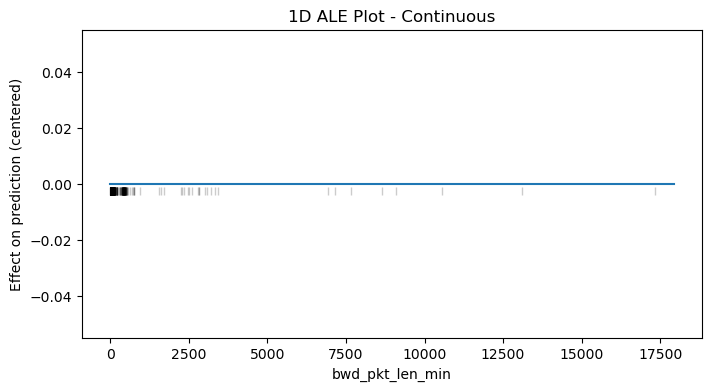

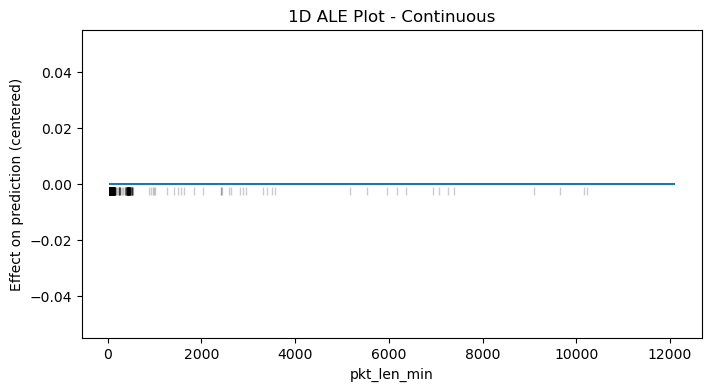

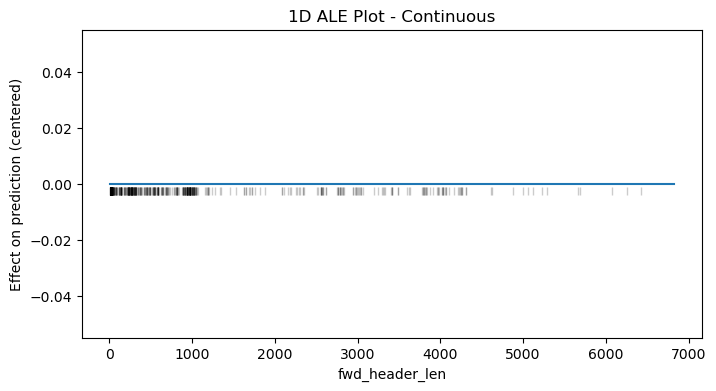

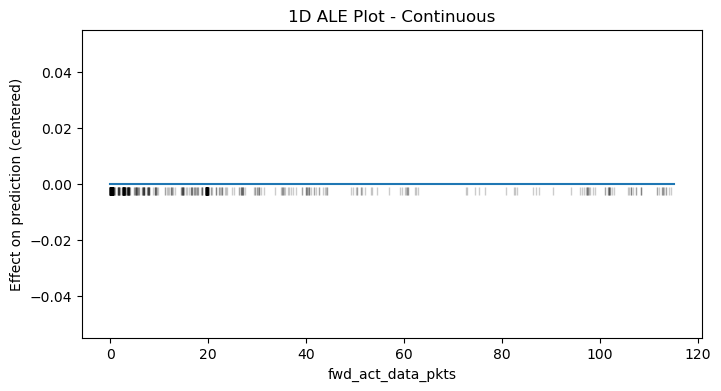

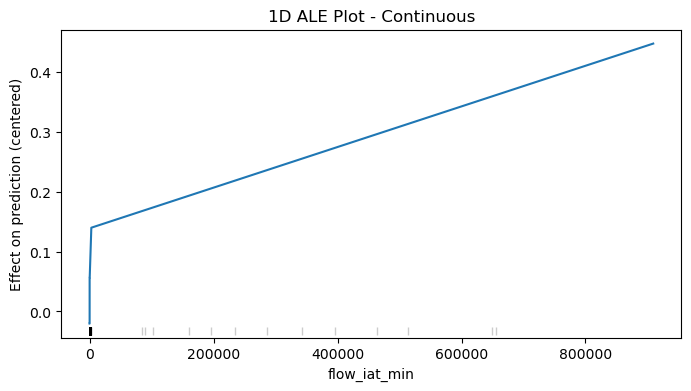

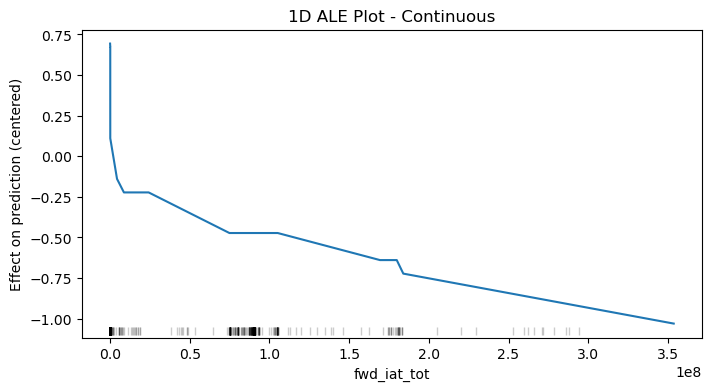

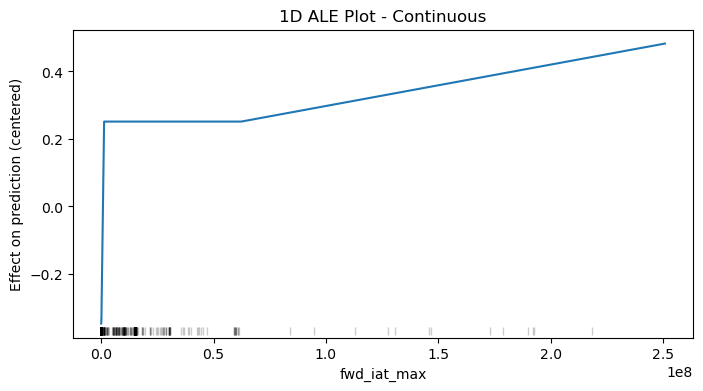

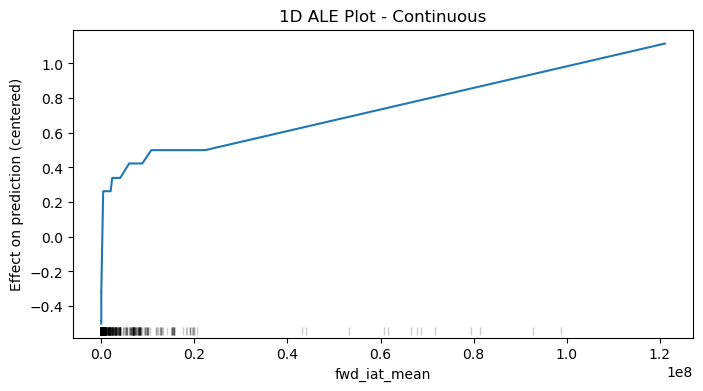

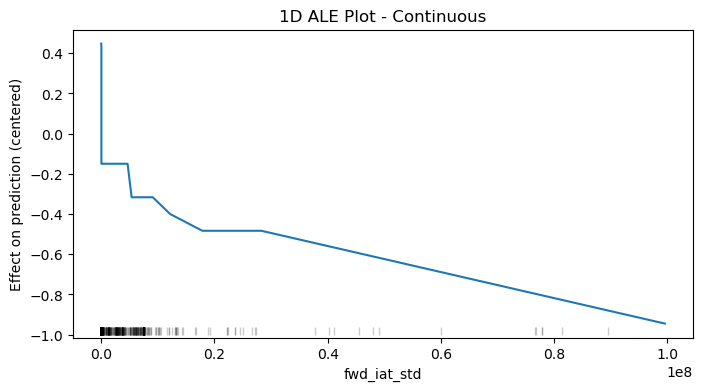

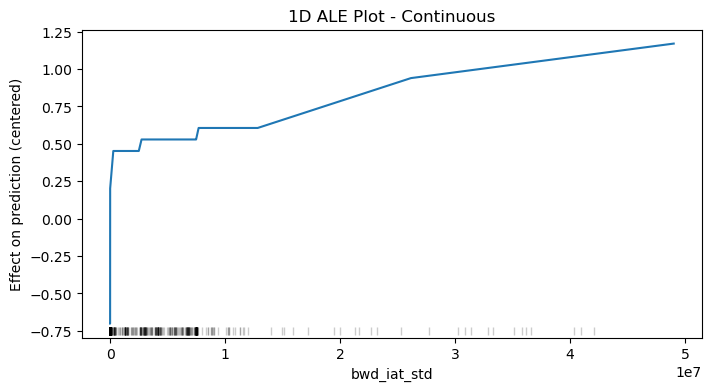

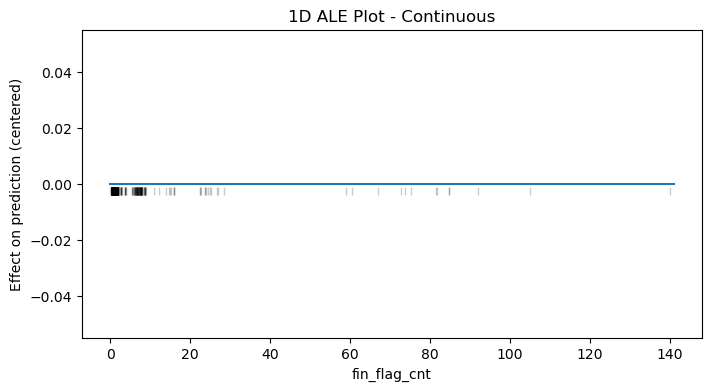

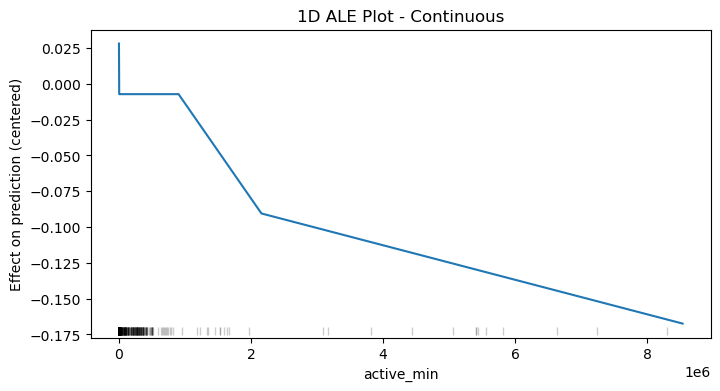

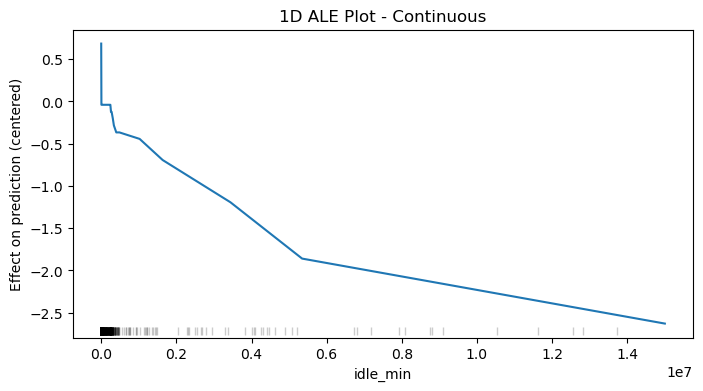

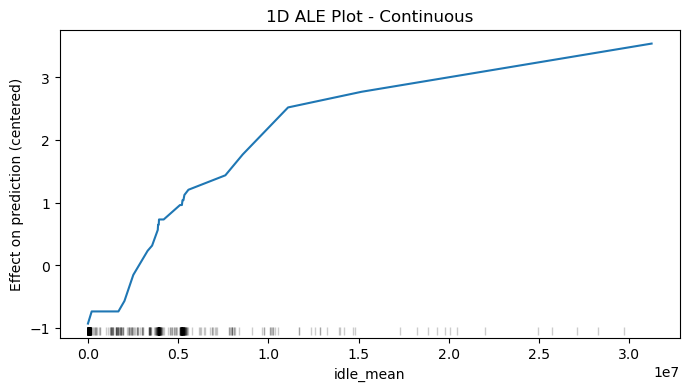

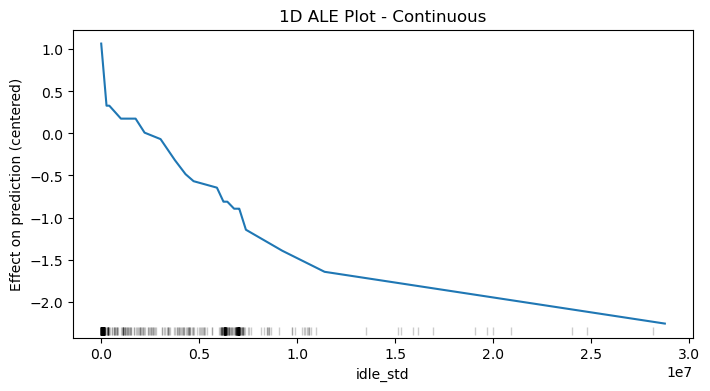

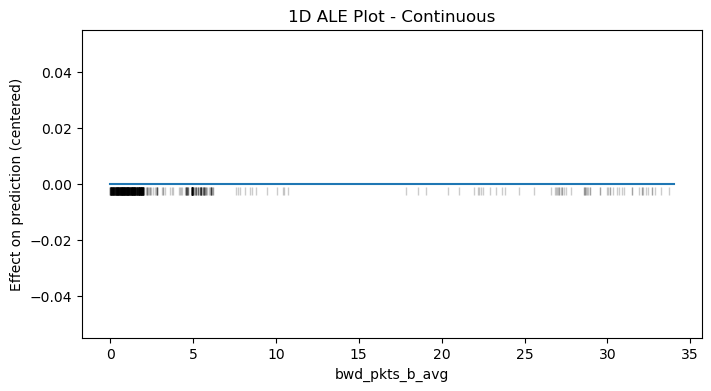

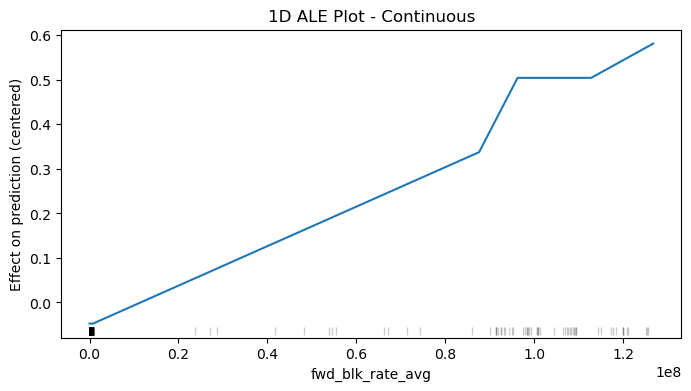

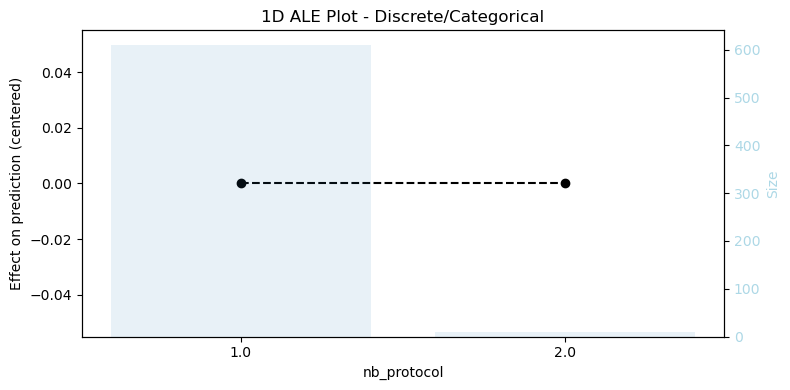

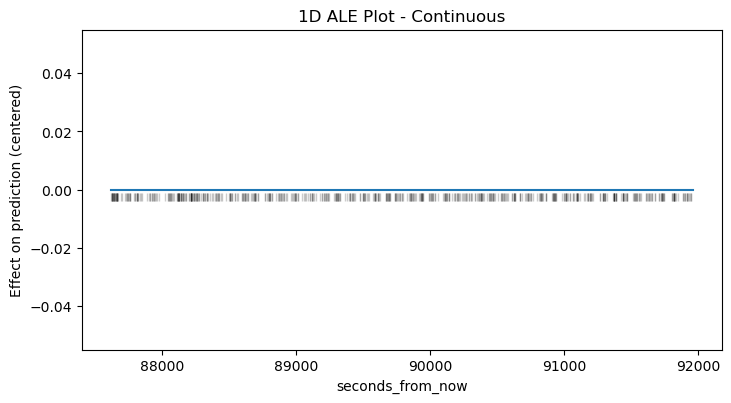

In [23]:

from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from PyALE import ale
model = LogisticRegression(random_state=42)
Y= np.nan_to_num(Y, nan=0)
model=model.fit(X, Y)
feature_list = X.columns
print(feature_list)
# Define the number of rows and columns for your subplot grid
num_rows = len(feature_list)+2 //3 # Adjust as needed

num_cols = 4

# Create a subplot grid
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 3*num_rows))

# Flatten the 2D array of subplots into a 1D array
axes = axes.flatten()

# Loop over each feature and plot its impact
for i, feature in enumerate(feature_list):
    percentile_95 = np.percentile(X[feature], 99)
    filtered_X = X[X[feature] <= percentile_95].copy()
    ale_eff = ale(X=filtered_X, model=model, feature=[feature], grid_size=50, include_CI=False)
    # Plot the ALE plot for the current feature
    axes[i].plot(ale_eff['eff'],  label=feature)
    axes[i].set_ylabel("ALE")
    axes[i].legend()

for j in range(len(feature_list), num_rows * num_cols):
    fig.delaxes(axes[j])

plt.subplots_adjust(left=0.1, right=0.9, top=0.9, bottom=0.1)

# Show the plot
plt.show()

In [20]:
!pip install PyALE